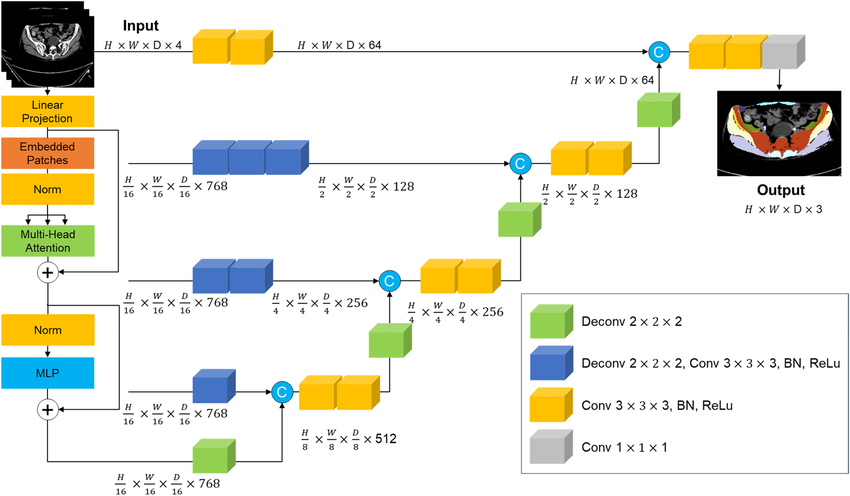
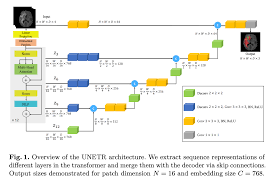

In [3]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model
from math import log2


import numpy as np
import cv2
import os
import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD
from patchify import patchify

2.17.0


# DEMO 1

In [ ]:
# def mlp(x, config_files):
#     x = L.Dense(config_files['mlp_dim'], activation="gelu")(x)
#     x = L.Dropout(config_files['dropout_rate'])(x)
#     x = L.Dense(config_files['hidden_dim'])(x)
#     x = L.Dropout(config_files['dropout_rate'])(x)
#     return x

# def transformer_encoder(x, config_files):
#     skip_1 = x
#     x = L.LayerNormalization()(x)
#     x = L.MultiHeadAttention(
#         num_heads = config_files['num_heads'],
#         key_dim = config_files['hidden_dim'],
#     )(x,x)
#     x = L.Add()([x, skip_1])

#     skip_2 = x
#     x = L.LayerNormalization()(x)
#     x = mlp(x, config_files)
#     x = L.Add()([x, skip_2])

#     return x

# def conv_block(x, num_filters, kernel_size = 3):
#     x = L.Conv2D(num_filters, kernel_size = kernel_size, padding = 'same')(x)
#     x = L.BatchNormalization()(x)
#     x = L.ReLU()(x)

#     return x

# def deconv_block(x, num_filters):
#     x = L.Conv2DTranspose(num_filters, kernel_size= 2, padding="same", strides=2)(x)
#     return x


# def Unetr(config_files):

#     """ Input """
#     input_shape = (config_files['num_patches'], config_files['patch_size'] * config_files['patch_size'] * config_files['num_channels'])
#     input = L.Input(input_shape)


#     """ Patch + Position Embeddings """
#     Embedded_patch = L.Dense(config_files['hidden_dim'])(input)
#     print(input.shape ,Embedded_patch.shape) # shape = (None, 256, 768)

#     position = tf.range(start=0, limit= config_files['num_patches'], delta=1) # 256 position, ranging from 0 to 255
#     print(position)

#     pos_embedded = L.Embedding(input_dim= config_files["num_patches"], output_dim=config_files["hidden_dim"])(position)
#     print(pos_embedded.shape)

#     x = Embedded_patch + pos_embedded


#     """ Transformer Encoder """
#     skip_connection_index = [3,6,9,12]
#     skip_connections = []

#     for i in range (1, config_files['num_layers'] + 1): # there are 12 layers 
#         x = transformer_encoder(x, config_files)

#         if i in skip_connection_index:
#             skip_connections.append(x)
#     print(x.shape)


#     """ CNN Decoder """
#     z3, z6, z9, z12 = skip_connections
    
#     size = config_files['image_size'] // config_files['patch_size'] # (H/16,W/16)

#     # Resizing shape of skip connection
#     z0 = L.Reshape((config_files['image_size'], config_files['image_size'], config_files['num_channels']))(input)
#     z3 = L.Reshape((size, size, config_files['hidden_dim']))(z3) # (H/16,W/16,D)  NOTE: D is dimension
#     z6 = L.Reshape((size, size, config_files['hidden_dim']))(z6) # (H/16,W/16,D)
#     z9 = L.Reshape((size, size, config_files['hidden_dim']))(z9) # (H/16,W/16,D)
#     z12 = L.Reshape((size, size, config_files['hidden_dim']))(z12) # (H/16,W/16,D)
#     print(z0.shape,z3.shape, z6.shape, z9.shape, z12.shape)


#     # Decoder layer 1
#     x = deconv_block(z12, 512)

#     s = deconv_block(z9, 512) # Process demonstrated in blue box
#     s = conv_block(s, 512) # Process demonstrated in blue box
#     print(x.shape, s.shape)

#     x = L.Concatenate()([x,s])
#     print(x.shape)

#     x = conv_block(x, 512) # Process demonstrated in yellow box
#     x = conv_block(x, 512) # Process demonstrated in yellow box
#     print(x.shape)



#     # Decoder layer 2
#     x = deconv_block(x, 256)

#     s = deconv_block(z6, 256) # Process demonstrated in blue box
#     s = conv_block(s, 256) # Process demonstrated in blue box
#     s = deconv_block(s, 256) # Process demonstrated in blue box
#     s = conv_block(s, 256) # Process demonstrated in blue box
#     print(x.shape, s.shape)

#     x = L.Concatenate()([x,s])
#     print(x.shape)

#     x = conv_block(x, 256) # Process demonstrated in yellow box
#     x = conv_block(x, 256) # Process demonstrated in yellow box
#     print(x.shape)


#     # Decoder layer 3
#     x = deconv_block(x, 128)

#     s = deconv_block(z3, 128) # Process demonstrated in blue box
#     s = conv_block(s, 128) # Process demonstrated in blue box
#     s = deconv_block(s, 128) # Process demonstrated in blue box
#     s = conv_block(s, 128) # Process demonstrated in blue box
#     s = deconv_block(s, 128) # Process demonstrated in blue box
#     s = conv_block(s, 128) # Process demonstrated in blue box

#     x = L.Concatenate()([x,s])
#     print(x.shape)

#     x = conv_block(x, 128) # Process demonstrated in yellow box
#     x = conv_block(x, 128) # Process demonstrated in yellow box
#     print(x.shape, z0.shape)


#     # Decoder layer 4
#     x = deconv_block(x, 64)

#     s = conv_block(z0, 64)
#     s = conv_block(s, 64)

#     x = L.Concatenate()([x,s])
#     print(x.shape)

#     x = conv_block(x, 64) # Process demonstrated in yellow box
#     x = conv_block(x, 64) # Process demonstrated in yellow box

#     output = L.Conv2D(1, kernel_size=1, padding="same", activation="sigmoid")(x)
#     print(output.shape)

#     return Model(input, output, name="Unetr_2D")


# if __name__ == '__main__':
#     config = {}
#     config['image_size'] = 256
#     config['num_layers'] = 12
#     config['hidden_dim'] = 768
#     config['mlp_dim'] = 3072
#     config['num_heads'] = 12
#     config['dropout_rate'] = 0.1
#     config['num_patches'] = 256
#     config['patch_size'] = 16
#     config['num_channels'] = 3

#     model = Unetr(config)
#     model.summary()

(None, 256, 768) (None, 256, 768)
tf.Tensor(
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 2

Model: "Unetr_2D"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 768)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256, 768)  │    590,592 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256, 768)  │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 256, 768)  │      1,536 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 768)  │ 28,339,968 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 256, 768)  │          0 │ multi_head_atten… │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 768)  │      1,536 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256, 3072) │  2,362,368 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256, 3072) │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256, 768)  │  2,360,064 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256, 768)  │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 256, 768)  │          0 │ dropout_2[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 768)  │      1,536 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 768)  │ 28,339,968 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 256, 768)  │          0 │ multi_head_atten… │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 768)  │      1,536 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256, 3072) │  2,362,368 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 256, 3072) │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256, 768)  │  2,360,064 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 256, 768)  │          0 │ dense_4[0][0]   

 Total params: 416,222,913 (1.55 GB)

 Trainable params: 416,216,001 (1.55 GB)

 Non-trainable params: 6,912 (27.00 KB)

# DEMO PRINTING SHAPE

In [ ]:
# def Unetr(config_files):
#     """ Input """
#     input_shape = (config_files['num_patches'], config_files['patch_size'] * config_files['patch_size'] * config_files['num_channels'])
#     input = L.Input(input_shape)

#     """ Patch + Position Embeddings """
#     Embedded_patch = L.Dense(config_files['hidden_dim'])(input)
#     print(f"[INFO] Input Shape: {input.shape}, Embedded Patch Shape: {Embedded_patch.shape}")  # Expected: (None, 256, 768)

#     position = tf.range(start=0, limit=config_files['num_patches'], delta=1)  # 256 positions (0 to 255)
#     print(f"[INFO] Position Encoding Range: {position}")

#     pos_embedded = L.Embedding(input_dim=config_files["num_patches"], output_dim=config_files["hidden_dim"])(position)
#     print(f"[INFO] Positional Embedding Shape: {pos_embedded.shape}")  # Expected: (256, 768)

#     x = Embedded_patch + pos_embedded

#     """ Transformer Encoder """
#     skip_connection_index = [3, 6, 9, 12]
#     skip_connections = []

#     for i in range(1, config_files['num_layers'] + 1):  # 12 layers
#         x = transformer_encoder(x, config_files)

#         if i in skip_connection_index:
#             skip_connections.append(x)
#             print(f"[INFO] Skip Connection {len(skip_connections)} stored at Layer {i}")

#     print(f"[INFO] Final Transformer Encoder Output Shape: {x.shape}")

#     """ CNN Decoder """
#     z3, z6, z9, z12 = skip_connections
#     size = config_files['image_size'] // config_files['patch_size']  # (H/16, W/16)

#     # Reshaping skip connections
#     z0 = L.Reshape((config_files['image_size'], config_files['image_size'], config_files['num_channels']))(input)
#     z3 = L.Reshape((size, size, config_files['hidden_dim']))(z3)
#     z6 = L.Reshape((size, size, config_files['hidden_dim']))(z6)
#     z9 = L.Reshape((size, size, config_files['hidden_dim']))(z9)
#     z12 = L.Reshape((size, size, config_files['hidden_dim']))(z12)

#     print(f"[INFO] Reshaped Skip Connections:")
#     print(f"      - z0: {z0.shape}, z3: {z3.shape}, z6: {z6.shape}, z9: {z9.shape}, z12: {z12.shape}")

#     """ Decoder Layers """
#     # Decoder Layer 1
#     x = deconv_block(z12, 512)
#     s = deconv_block(z9, 512)
#     s = conv_block(s, 512)

#     print(f"[INFO] Decoder Layer 1 Shapes: x={x.shape}, s={s.shape}")

#     x = L.Concatenate()([x, s])
#     x = conv_block(x, 512)
#     x = conv_block(x, 512)
#     print(f"[INFO] After Layer 1 Convolutions: {x.shape}")

#     # Decoder Layer 2
#     x = deconv_block(x, 256)
#     s = deconv_block(z6, 256)
#     s = conv_block(s, 256)
#     s = deconv_block(s, 256)
#     s = conv_block(s, 256)

#     print(f"[INFO] Decoder Layer 2 Shapes: x={x.shape}, s={s.shape}")

#     x = L.Concatenate()([x, s])
#     x = conv_block(x, 256)
#     x = conv_block(x, 256)
#     print(f"[INFO] After Layer 2 Convolutions: {x.shape}")

#     # Decoder Layer 3
#     x = deconv_block(x, 128)
#     s = deconv_block(z3, 128)
#     s = conv_block(s, 128)
#     s = deconv_block(s, 128)
#     s = conv_block(s, 128)
#     s = deconv_block(s, 128)
#     s = conv_block(s, 128)

#     x = L.Concatenate()([x, s])
#     print(f"[INFO] Decoder Layer 3 Shape After Concatenation: {x.shape}")

#     x = conv_block(x, 128)
#     x = conv_block(x, 128)
#     print(f"[INFO] After Layer 3 Convolutions: x={x.shape}, z0={z0.shape}")

#     # Decoder Layer 4
#     x = deconv_block(x, 64)
#     s = conv_block(z0, 64)
#     s = conv_block(s, 64)

#     x = L.Concatenate()([x, s])
#     print(f"[INFO] Decoder Layer 4 Shape After Concatenation: {x.shape}")

#     x = conv_block(x, 64)
#     x = conv_block(x, 64)

#     output = L.Conv2D(1, kernel_size=1, padding="same", activation="sigmoid")(x)
#     print(f"[INFO] Final Output Shape: {output.shape}")

# if __name__ == '__main__':
#     config = {
#         'image_size': 256,
#         'num_layers': 12,
#         'hidden_dim': 768,
#         'mlp_dim': 3072,
#         'num_heads': 12,
#         'dropout_rate': 0.1,
#         'num_patches': 256,
#         'patch_size': 16,
#         'num_channels': 3
#     }

#     Unetr(config)


[INFO] Input Shape: (None, 256, 768), Embedded Patch Shape: (None, 256, 768)
[INFO] Position Encoding Range: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 21

# MAINSTREAM

In [6]:
def mlp(x, config_files):
    x = L.Dense(config_files['mlp_dim'], activation="gelu")(x)
    x = L.Dropout(config_files['dropout_rate'])(x)
    x = L.Dense(config_files['hidden_dim'])(x)
    x = L.Dropout(config_files['dropout_rate'])(x)
    return x

def transformer_encoder(x, config_files):
    skip_1 = x
    x = L.LayerNormalization()(x)
    x = L.MultiHeadAttention(
        num_heads = config_files['num_heads'],
        key_dim = config_files['hidden_dim'],
    )(x,x)
    x = L.Add()([x, skip_1])

    skip_2 = x
    x = L.LayerNormalization()(x)
    x = mlp(x, config_files)
    x = L.Add()([x, skip_2])

    return x

def conv_block(x, num_filters, kernel_size = 3):
    x = L.Conv2D(num_filters, kernel_size = kernel_size, padding = 'same')(x)
    x = L.BatchNormalization()(x)
    x = L.ReLU()(x)

    return x

def deconv_block(x, num_filters):
    x = L.Conv2DTranspose(num_filters, kernel_size= 2, padding="same", strides=2)(x)
    return x


def Unetr(config_files):

    """ Input """
    input_shape = (config_files['num_patches'], config_files['patch_size'] * config_files['patch_size'] * config_files['num_channels'])
    input = L.Input(input_shape)


    """ Patch + Position Embeddings """
    Embedded_patch = L.Dense(config_files['hidden_dim'])(input)
    print(input.shape ,Embedded_patch.shape) # shape = (None, 256, 768)

    position = tf.range(start=0, limit= config_files['num_patches'], delta=1) # 256 position, ranging from 0 to 255
    print(position)

    pos_embedded = L.Embedding(input_dim= config_files["num_patches"], output_dim=config_files["hidden_dim"])(position)
    print(pos_embedded.shape)

    x = Embedded_patch + pos_embedded


    """ Transformer Encoder """
    skip_connection_index = [3,6,9,12]
    skip_connections = []

    for i in range (1, config_files['num_layers'] + 1): # there are 12 layers 
        x = transformer_encoder(x, config_files)

        if i in skip_connection_index:
            skip_connections.append(x)
    print(x.shape)


    """ CNN Decoder """
    z3, z6, z9, z12 = skip_connections
    
    size = config_files['image_size'] // config_files['patch_size'] # (H/16,W/16)

    # Resizing shape of skip connection
    z0 = L.Reshape((config_files['image_size'], config_files['image_size'], config_files['num_channels']))(input)
    z3 = L.Reshape((size, size, config_files['hidden_dim']))(z3) # (H/16,W/16,D)  NOTE: D is dimension
    z6 = L.Reshape((size, size, config_files['hidden_dim']))(z6) # (H/16,W/16,D)
    z9 = L.Reshape((size, size, config_files['hidden_dim']))(z9) # (H/16,W/16,D)
    z12 = L.Reshape((size, size, config_files['hidden_dim']))(z12) # (H/16,W/16,D)
    print(z0.shape,z3.shape, z6.shape, z9.shape, z12.shape)


    # Additional layers for handling different patch sizes
    total_upscale_factor = int(log2(config_files["patch_size"]))
    upscale = total_upscale_factor - 4

    if upscale >= 2: ## Patch size 16 or greater
        z3 = deconv_block(z3, z3.shape[-1], strides=2**upscale)
        z6 = deconv_block(z6, z6.shape[-1], strides=2**upscale)
        z9 = deconv_block(z9, z9.shape[-1], strides=2**upscale)
        z12 = deconv_block(z12, z12.shape[-1], strides=2**upscale)
        # print(z3.shape, z6.shape, z9.shape, z12.shape)

    if upscale < 0: ## Patch size less than 16
        p = 2**abs(upscale)
        z3 = L.MaxPool2D((p, p))(z3)
        z6 = L.MaxPool2D((p, p))(z6)
        z9 = L.MaxPool2D((p, p))(z9)
        z12 = L.MaxPool2D((p, p))(z12)



    # Decoder layer 1
    x = deconv_block(z12, 512)

    s = deconv_block(z9, 512) # Process demonstrated in blue box
    s = conv_block(s, 512) # Process demonstrated in blue box
    print(x.shape, s.shape)

    x = L.Concatenate()([x,s])
    print(x.shape)

    x = conv_block(x, 512) # Process demonstrated in yellow box
    x = conv_block(x, 512) # Process demonstrated in yellow box
    print(x.shape)



    # Decoder layer 2
    x = deconv_block(x, 256)

    s = deconv_block(z6, 256) # Process demonstrated in blue box
    s = conv_block(s, 256) # Process demonstrated in blue box
    s = deconv_block(s, 256) # Process demonstrated in blue box
    s = conv_block(s, 256) # Process demonstrated in blue box
    print(x.shape, s.shape)

    x = L.Concatenate()([x,s])
    print(x.shape)

    x = conv_block(x, 256) # Process demonstrated in yellow box
    x = conv_block(x, 256) # Process demonstrated in yellow box
    print(x.shape)


    # Decoder layer 3
    x = deconv_block(x, 128)

    s = deconv_block(z3, 128) # Process demonstrated in blue box
    s = conv_block(s, 128) # Process demonstrated in blue box
    s = deconv_block(s, 128) # Process demonstrated in blue box
    s = conv_block(s, 128) # Process demonstrated in blue box
    s = deconv_block(s, 128) # Process demonstrated in blue box
    s = conv_block(s, 128) # Process demonstrated in blue box

    x = L.Concatenate()([x,s])
    print(x.shape)

    x = conv_block(x, 128) # Process demonstrated in yellow box
    x = conv_block(x, 128) # Process demonstrated in yellow box
    print(x.shape, z0.shape)


    # Decoder layer 4
    x = deconv_block(x, 64)

    s = conv_block(z0, 64)
    s = conv_block(s, 64)

    x = L.Concatenate()([x,s])
    print(x.shape)

    x = conv_block(x, 64) # Process demonstrated in yellow box
    x = conv_block(x, 64) # Process demonstrated in yellow box

    output = L.Conv2D(1, kernel_size=1, padding="same", activation="sigmoid")(x)
    print(output.shape)

    return Model(input, output, name="Unetr_2D")


if __name__ == '__main__':
    config = {}
    config['image_size'] = 512
    config['num_layers'] = 12
    config['hidden_dim'] = 64
    config['mlp_dim'] = 128
    config['num_heads'] = 6
    config['dropout_rate'] = 0.1
    config['patch_size'] = 1
    config['num_patches'] = (config['image_size']**2) // (config['patch_size']**2)
    config['num_channels'] = 3

    model = Unetr(config)
    model.summary()

(None, 262144, 3) (None, 262144, 64)
tf.Tensor([     0      1      2 ... 262141 262142 262143], shape=(262144,), dtype=int32)
(262144, 64)
(None, 262144, 64)
(None, 512, 512, 3) (None, 512, 512, 64) (None, 512, 512, 64) (None, 512, 512, 64) (None, 512, 512, 64)
(None, 64, 64, 512) (None, 64, 64, 512)
(None, 64, 64, 1024)
(None, 64, 64, 512)
(None, 128, 128, 256) (None, 128, 128, 256)
(None, 128, 128, 512)
(None, 128, 128, 256)
(None, 256, 256, 256)
(None, 256, 256, 128) (None, 512, 512, 3)
(None, 512, 512, 128)
(None, 512, 512, 1)


Model: "Unetr_2D"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 262144, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 262144,    │        256 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_50 (Add)        │ (None, 262144,    │          0 │ dense_50[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 262144,    │        128 │ add_50[0][0]      │
│ (LayerNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 262144,    │     99,520 │ layer_normalizat… │
│ (MultiHeadAttentio… │ 64)               │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_51 (Add)        │ (None, 262144,    │          0 │ multi_head_atten… │
│                     │ 64)               │            │ add_50[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 262144,    │        128 │ add_51[0][0]      │
│ (LayerNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 262144,    │      8,320 │ layer_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_73          │ (None, 262144,    │          0 │ dense_51[0][0]    │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_52 (Dense)    │ (None, 262144,    │      8,256 │ dropout_73[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_74          │ (None, 262144,    │          0 │ dense_52[0][0]    │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_52 (Add)        │ (None, 262144,    │          0 │ dropout_74[0][0], │
│                     │ 64)               │            │ add_51[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 262144,    │        128 │ add_52[0][0]      │
│ (LayerNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 262144,    │     99,520 │ layer_normalizat… │
│ (MultiHeadAttentio… │ 64)               │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_53 (Add)        │ (None, 262144,    │          0 │ multi_head_atten… │
│                     │ 64)               │            │ add_52[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 262144,    │        128 │ add_53[0][0]      │
│ (LayerNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_53 (Dense)    │ (None, 262144,    │      8,320 │ layer_normalizat

 Total params: 16,278,209 (62.10 MB)

 Trainable params: 16,271,297 (62.07 MB)

 Non-trainable params: 6,912 (27.00 KB)

# Training Step

In [18]:
config = {}
config['image_size'] = 256
config['num_layers'] = 12
config['hidden_dim'] = 128
config['mlp_dim'] = 32
config['num_heads'] = 6
config['dropout_rate'] = 0.1
config['patch_size'] = 16
config['num_patches'] = (config['image_size']**2) // (config['patch_size']**2)
config['num_channels'] = 3

config["flat_patches_shape"] = (
    config["num_patches"],
    config["patch_size"]*config["patch_size"]*config["num_channels"]
)

In [8]:
# Create directory for saving weights
def create_dir(path): 
    if not os.path.exists(path):
        os.makedirs(path)

In [9]:
# Data Loader Function
def load_data(path, split = 0.1):
    """ Load the Images and Masks"""
    X = sorted(glob.glob(os.path.join(path, "images", "*.png")))
    Y = sorted(glob.glob(os.path.join(path, "masks", "*.png")))

    if len(X) != len(Y):
        print(f"Warning: Number of images ({len(X)}) and masks ({len(Y)}) do not match!")


    """ Splitting the dataset """
    split_size = int(len(X) * split)
    print("Splitting Size: ", split_size, "\n")

    train_x, valid_x = train_test_split(X, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(Y, test_size=split_size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)


In [24]:
# def read_image(path):
#     path = path.decode()
#     image = cv2.imread(path, cv2.IMREAD_COLOR)
#     image = cv2.resize(image, (config["image_size"], config["image_size"]))
#     image = image / 255.0

#     """ Processing to patches """
#     patch_shape = (config["patch_size"], config["patch_size"], config["num_channels"])
#     patches = patchify(image, patch_shape, config["patch_size"])
#     patches = np.reshape(patches, config["flat_patches_shape"])
#     patches = patches.astype(np.float32)

#     return patches

def read_image(path):
    path = path.decode()
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Warning: Unable to load image at path: {path}")
        return np.zeros((config['image_size'], config['image_size'], config['num_channels']), dtype=np.float32)
    image = cv2.resize(image, (config["image_size"], config["image_size"]))
    image = image / 255.0

    patch_shape = (config["patch_size"], config["patch_size"], config["num_channels"])
    patches = patchify(image, patch_shape, config["patch_size"])
    patches = np.reshape(patches, config["flat_patches_shape"])
    patches = patches.astype(np.float32)

    return patches


def read_mask(path):
    path = path.decode()
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (config['image_size'], config['image_size']))
    mask = mask/255.0
    mask = mask.astype(np.float32)
    mask = np.expand_dims(mask, axis=-1)

    return mask

In [19]:
def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape(config["flat_patches_shape"])
    y.set_shape([config["image_size"], config["image_size"], 1])
    return x, y

def tf_dataset(X, Y, batch=2):
    ds = tf.data.Dataset.from_tensor_slices((X, Y))
    ds = ds.map(tf_parse).batch(batch).prefetch(10)
    return ds

In [16]:
import numpy as np
import tensorflow as tf

smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [25]:
if __name__ == '__main__':
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for saving weights """	
    create_dir("save_weights")


    """ Hyperparameters """
    batch_size = 8
    learning_rate = 0.1
    num_epochs = 100
    model_path = os.path.join("save_weights", "Unettr_2D.keras")
    csv_path = os.path.join("save_weights", "history.csv")


    """ Load the Dataset """
    dataset_path = r"C:\Users\dangq\OneDrive\Máy tính\USTH\ICT\MLMED2025\mlmed2025\UNETR\Lung Tumor Segmentation"
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data(dataset_path)
    print(f"Train: \t{len(train_x)} - {len(train_y)}")
    print(f"Valid: \t{len(valid_x)} - {len(valid_y)}")
    print(f"Test: \t{len(test_x)} - {len(test_y)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)


    """ Model Implementation """
    model = Unetr(config)
    model.compile(loss=dice_loss, optimizer=SGD(learning_rate), metrics= [dice_coef, 'acc'])

    callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False)
    ]
    model.fit(
        train_dataset,
        epochs=num_epochs,
        validation_data=valid_dataset,
        callbacks=callbacks
    )

Splitting Size:  256 

Train: 	2050 - 2050
Valid: 	256 - 256
Test: 	256 - 256
(None, 256, 768) (None, 256, 128)
tf.Tensor(
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

Traceback (most recent call last):

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\dangq\AppData\Local\Temp\__autograph_generated_fileaux6kss4.py", line 17, in _parse
    y = ag__.converted_call(ag__.ld(read_mask), (ag__.ld(y),), None, fscope_1)

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 335, in converted_call
    return _call_unconverted(f, args, kwargs, options, False)

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 460, in _call_unconverted
    return f(*args)

  File "C:\Users\dangq\AppData\Local\Temp\ipykernel_10436\4163180999.py", line 35, in read_mask
    mask = cv2.resize(mask, (config['image_size'], config['image_size']))

cv2.error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_85352]

In [28]:
image = cv2.imread(r"C:\Users\dangq\OneDrive\Máy tính\USTH\ICT\MLMED2025\mlmed2025\UNETR\Lung Tumor Segmentation\images\aug_train_4.png")
if image is None:
    print("Failed to load the image.")
else:
    print("Image loaded successfully.")


Failed to load the image.
